In [1]:
#importing necessary packages

import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
#import pickle

In [10]:
file_list = []
class_list = []
IMG_SIZE = 32 # The size of images the network will work on

In [3]:
#All the categories that should be detect in neural network 

CATEGORIES = {'0':'0', 'A':'A', 'B':'B', 'C':"C", 'D':'D', 'E':'E', 'F':'F', 'G':'G', 'H':'H', 'I':'I', 'J':'J', 'K':'K', 'L':'L', 'M':'M', 'N':'N', 'O':'O', 'P':'P', 'Q':'Q', 'R':'R', 'S':'S', 'T':'T', 'U':'U', 'V':'V', 'W':'W', 'X':'X', 'Y':'Y','Z':'Z', 'ra-':'रा', 'a_':'a', 'b_':'b', 'c_':'c', 'd_':'d', 'e_':'e', 'f_':'f', 'g_':'g', 'h_':'h', 'i_':'i', 'j_':'j', 'k_':'k', 'l_':'l', 'm_':'m', 'n_':'n', 'o_':'o', 'p_':'p', 'q_':'q', 'r_':'r', 's_':'s', 't_':'t', 'u_':'u', 'v_':'v', 'w_':'w', 'x_':'x', 'y_':'y', 'z_':'z', 'hi-':'क', 'aa-':'आ', 'cc-':'ক', 'mm-':'ম'} 
ignore_files = ['1 - Model-creation','2 - Images'] #This files/folder should not include in neural network
DATADIR = r'C:\Users\bivan\Desktop\preprocessing\data\database'
# # for directoryfile in os.listdir(DATADIR):
#     if(directoryfile in ignore_files):
#         continue
#     CATEGORIES.append(directoryfile) #Append all the character's name as label in 'CATEGORIES'
print(len(CATEGORIES))

58


In [2]:
CATEGORIES = {'akar':' া','cha':'চ','gu':'গু','kh':'খ','kha':'খা','la':'ল','lee':'লে','ndra':'ন্দ্র','nn':'ন','oo':'অ'}
DATADIR = r'C:\Users\bivan\Desktop\preprocessing\data\bangla' 
print(len(CATEGORIES))              

10


In [12]:
CATEGORIES = {'aa':'आ','akar':'T','bb':'ब','dd':'द','ga':'जा','gg':'ग','kk':'क','ll':'ल','rr':'र','ss':'स'}
DATADIR = r'C:\Users\bivan\Desktop\preprocessing\data\hindi' 
print(len(CATEGORIES))              

10


In [4]:
# for i in range(10):
#     for j in range(i):
#         for k in range(j):
#             print(k, end=" -- ")

# _ = [print(k, end=" -- ") for i in range(10) for j in range(i) for k in range(j)] 
# l = []
# for i in range(26):
#     if(i%2==0):
#         l.append(chr(i+97))
#     else:
#         l.append(chr(i+65))
    
l = [chr(i+97) if (i%3==0) else '$' if(i%3==1) else chr(i+65) for i in range(26)]
l

['a',
 '$',
 'C',
 'd',
 '$',
 'F',
 'g',
 '$',
 'I',
 'j',
 '$',
 'L',
 'm',
 '$',
 'O',
 'p',
 '$',
 'R',
 's',
 '$',
 'U',
 'v',
 '$',
 'X',
 'y',
 '$']

In [40]:
# [print(val) for val in list(CATEGORIES.values())] (list comprehenssion)
for val in list(CATEGORIES.values()):
    print(val, end=" ")
print()

 া চ গু খ খা ল লে ন্দ্র ন অ 


In [13]:
training_data = []

def create_training_data():
    for i, category in enumerate(list(CATEGORIES.keys())):
        path = os.path.join(DATADIR, category)
        class_num = i # Charcater's name label as class number 
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Converting image into grayscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #Resizing all images into same size (50,50)
                training_data.append([new_array, class_num]) # append all images with their respective class name
            except Exception as e:
                print(path)
                pass

create_training_data()



In [14]:
#Storing features in X and labels in Y using numpy

random.shuffle(training_data)
X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#y = np.array(y)

In [8]:
#Saving features and label in pickle files

# pickle_out = open("X1.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y1.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [15]:
print(training_data)

[[array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [253, 251, 255, ..., 255, 255, 255],
       [248, 253, 253, ..., 255, 255, 255],
       [243, 254, 252, ..., 255, 255, 255]], dtype=uint8), 5], [array([[ 58,  59,  60, ...,  68,  68,  68],
       [ 58,  58,  59, ...,  69,  69,  69],
       [ 56,  56,  57, ...,  45,  45,  45],
       ...,
       [171, 172, 170, ..., 120, 121, 119],
       [171, 172, 170, ..., 120, 121, 119],
       [170, 172, 170, ..., 123, 124, 122]], dtype=uint8), 1], [array([[186, 185, 186, ..., 186, 186, 186],
       [184, 187, 186, ..., 186, 186, 186],
       [187, 185, 186, ..., 187, 187, 187],
       ...,
       [186, 186, 186, ..., 186, 186, 186],
       [186, 186, 186, ..., 186, 186, 186],
       [186, 186, 186, ..., 186, 186, 186]], dtype=uint8), 0], [array([[225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225, ..., 225, 225, 225],
       [225, 225, 225,

In [3]:
#importing necessary packages

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [17]:
#X = X/255


print(X.shape)
#print(y.shape)

(3050, 32, 32, 1)


In [18]:
from keras.utils import np_utils
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train.ndim

(2440, 32, 32, 1)
(2440, 10)
(610, 32, 32, 1)
(610, 10)


4

In [14]:
#Loading pickle files

#file_path_X = open(os.path.join(r"C:\Users\bivan\Desktop\preprocessing\X1.pickle"), 'rb')
#file_path_Y = open(os.path.join(r"C:\Users\bivan\Desktop\preprocessing\y1.pickle"), 'rb')
#X = pickle.load(file_path_X)
#y = pickle.load(file_path_Y)'''

In [15]:
#number_of_classes = max(y) + 1 #Number of classes

In [16]:
#X = X/255.0 #Normalising the images

In [17]:
#print(X.shape)

In [20]:
x_train = x_train/255.0
x_test = x_test/255.0

In [21]:
# Building the model
input_layer = tf.keras.layers.Input(x_train.shape[1:])

conv1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=(5,5), padding='Same', activation='relu', data_format = 'channels_last')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
drop1 = tf.keras.layers.Dropout(0.25)(pool1)

conv2 = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding='Same', activation='relu')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)
drop2 = tf.keras.layers.Dropout(0.25)(pool2)

# conv3 = tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding='Same', activation='relu')(pool2)
# pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)
#drop3 = tf.keras.layers.Dropout(0.25)(pool3)

conv4 = tf.keras.layers.Conv2D(filters = 96, kernel_size=(3,3), padding='Same', activation='relu')(drop2)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)
drop4 = tf.keras.layers.Dropout(0.25)(pool4)

conv5 = tf.keras.layers.Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation='relu')(drop4)
pool5 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv5)
drop5 = tf.keras.layers.Dropout(0.25)(pool5)
#dn0 = tf.keras.layers.Dense(256, activation='relu')(pool5)
flat1 = tf.keras.layers.Flatten()(drop5)

dn1 = tf.keras.layers.Dense(256, activation='relu')(flat1)
#drop5 = tf.keras.layers.Dropout(0.5)(dn1)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(dn1)

model = tf.keras.Model(input_layer, output_layer)

# Compiling the model using some basic parameters
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
61/61 [==============================] - 5s 55ms/step - loss: 2.2769 - accuracy: 0.1489 - val_loss: 2.2687 - val_accuracy: 0.1537
Epoch 2/100
61/61 [==============================] - 3s 52ms/step - loss: 2.2188 - accuracy: 0.1730 - val_loss: 1.9242 - val_accuracy: 0.2439
Epoch 3/100
61/61 [==============================] - 3s 53ms/step - loss: 1.8908 - accuracy: 0.2937 - val_loss: 1.6189 - val_accuracy: 0.3914
Epoch 4/100
61/61 [==============================] - 3s 51ms/step - loss: 1.5703 - accuracy: 0.3967 - val_loss: 1.5346 - val_accuracy: 0.4201
Epoch 5/100
61/61 [==============================] - 3s 52ms/step - loss: 1.3478 - accuracy: 0.4687 - val_loss: 1.2439 - val_accuracy: 0.4795
Epoch 6/100
61/61 [==============================] - 3s 53ms/step - loss: 1.1225 - accuracy: 0.5832 - val_loss: 0.9954 - val_accuracy: 0.6209
Epoch 7/100
61/61 [==============================] - 3s 53ms/step - loss: 0.9343 - accuracy: 0.6588 - val_loss: 0.7959 - val_accuracy: 0.7357
Epoch 

In [22]:
import time
time1 = time.time()
#train_set =len(x_train)
#train_set1 = (train_set, len(y_train))
history = model.fit(x_train, y_train,      
                        epochs=30,
                        batch_size = 32,      
                        validation_data=(x_test, y_test),
                        verbose=2)
        
time2 = time.time()
score = model.evaluate(x_test, y_test)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])                      

Epoch 1/30
77/77 - 4s - loss: 0.1509 - accuracy: 0.9594 - val_loss: 0.2569 - val_accuracy: 0.9311
Epoch 2/30
77/77 - 4s - loss: 0.1200 - accuracy: 0.9607 - val_loss: 0.1569 - val_accuracy: 0.9492
Epoch 3/30
77/77 - 4s - loss: 0.0874 - accuracy: 0.9750 - val_loss: 0.1544 - val_accuracy: 0.9541
Epoch 4/30
77/77 - 4s - loss: 0.0448 - accuracy: 0.9881 - val_loss: 0.1027 - val_accuracy: 0.9623
Epoch 5/30
77/77 - 4s - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.1313 - val_accuracy: 0.9639
Epoch 6/30
77/77 - 4s - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.1158 - val_accuracy: 0.9590
Epoch 7/30
77/77 - 4s - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.1681 - val_accuracy: 0.9525
Epoch 8/30
77/77 - 4s - loss: 0.0428 - accuracy: 0.9889 - val_loss: 0.1506 - val_accuracy: 0.9557
Epoch 9/30
77/77 - 4s - loss: 0.0448 - accuracy: 0.9836 - val_loss: 0.1844 - val_accuracy: 0.9459
Epoch 10/30
77/77 - 5s - loss: 0.0634 - accuracy: 0.9783 - val_loss: 0.1772 - val_accuracy: 0.9541
Epoch 11/30
77/77 -

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0     

In [24]:
score = model.evaluate(x_test, y_test)
model.save('hindi.h5')
#tf.keras.models.save_model( 'cnn1.h5', save_format='h5')

20/20 [==============================] - 0s 8ms/step - loss: 0.2271 - accuracy: 0.9508


In [21]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, LSTM
# model = Sequential()
# model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 1), activation='relu'))
# model.add(Conv2D(64, (3, 3), input_shape=(30, 30, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.05))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
# # Compile model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=32, verbose=2)
# #model evaluation
# val_loss, val_acc = model.evaluate(x_test, y_test)
# print(val_loss)
# print(val_acc)
# #save the model
# model.save('bacnn2.h5')
#load saved model
#new_model = tf.keras.models.load_model('Thresholded_Blurred_Trained')
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
          
# import time
# time1 = time.time()
# #train_set =len(x_train)
# #train_set1 = (train_set, len(y_train))
# history = model.fit(x_train, y_train,      
#                         epochs=10,
#                         batch_size = 32,      
#                         validation_data=(x_test, y_test),
#                         verbose=1)
        
# time2 = time.time()
# score = model.evaluate(x_test, y_test, verbose=1)
# time3 = time.time()
# print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])                                


Epoch 1/15


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [320]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-21-b8da3d7fecfb>:14) ]] [Op:__inference_train_function_1159]

Function call stack:
train_function


In [ ]:
#model.save('cnn.model')
#tf.keras.models.save_model(model, 'cnn1.h5', save_format='h5')

In [ ]:
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

In [ ]:
# prediction = model.predict(x_test)

# plt.figure(figsize=(10,10))

# for i,image in enumerate(x_test[:]):
#     plt.subplot(1,5,i+1)
#     plt.imshow(x_test[i], cmap='gray')
    
#     plt.title('Actual:'+CATEGORIES[list(CATEGORIES.keys())[y_test[i]]]+'\n'+'predicted:'+CATEGORIES[list(CATEGORIES.keys())[np.argmax(prediction[i])]])
#     plt.axis("off")
#     plt.xticks([])
   
    
# plt.show()    


prediction = model.predict(x_test)

plt.figure(figsize=(16,16))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i],cmap='gray')
    #m=np.array(list(CATEGORIES.keys())[y_test[i]])
    plt.xlabel('Actual:'+CATEGORIES[np.array(list(CATEGORIES.keys())).astype(int)[y_test[i]]]+'\n'+'predicted:'+CATEGORIES[np.array(list(CATEGORIES.keys())).astype(int)[np.argmax(prediction[i])]])
    
    plt.xticks([])
    
plt.show()    

In [1]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
# Lets save our model 

from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model


model_json = model.to_json()

with open("dcr1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("dcr1.h5")

In [ ]:
# load json and create model
json_file = open('dcr1.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("dcr1.h5")
print("Loaded model from disk")

loaded_model.save('dcr1.hdf5')
loaded_model=load_model('dcr1.hdf5', compile = False)

Enter the image name:ex5.jpg
Upload The Image:ex5.jpg
Original Image :


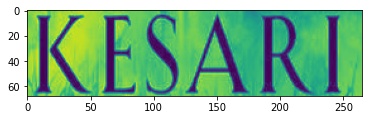

Binarized Image :


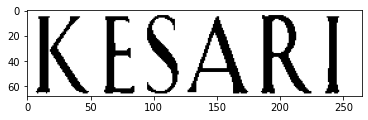

Actual Word Is: ex5


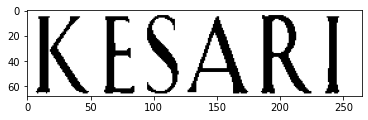

Predicted word is :  O
After Postprocessing (Comparing Both Strings) The Final Word is: ex5


In [12]:
import imutils
from keras.preprocessing import image
import os
new_model = tf.keras.models.load_model('bicnn.h5')
#base=os.path.basename(r'C:\Users\bivan\Desktop\char\कTGHARE.jpg')
Name= input('Enter the image name:')
userimage = input('Upload The Image:')
image = cv2.imread(userimage, cv2.IMREAD_GRAYSCALE)
image1=cv2.fastNlMeansDenoising(image,11,11,15,21)
cv2.imwrite('kesari_denoise.png',image)
cv2.imwrite('kesari_gray.png',image)
str1 = os.path.splitext(Name)[0]
#print('Actual Word Is:',str1)
print("Original Image :")
plt.imshow(image)

plt.show()

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(image, (3,3 ), 0)

thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1]
cv2.imwrite('final1.png',thresh1)
#thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 13, 10)
print("Binarized Image :")
plt.imshow(thresh1,cmap='gray')
plt.show()
print('Actual Word Is:',str1)
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
dilate = cv2.dilate(thresh1, rect_kern, iterations = 1)
plt.imshow(dilate,cmap='gray')
plt.show()
# cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[1] if imutils.is_cv3() else cnts[0]
# sorted_ctrs = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[1] + cv2.boundingRect(ctr)[0] * image.shape[0] )

#img = cv2.imread('C:/Users/bivan/Desktop/preprocessing/kanha.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.GaussianBlur(img, (5, 5), 0)
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#cv2.THRESH_BINARY_INV, 13, 10)
#plt.imshow(dilate)
contours,_= cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#contours = contours[1] if imutils.is_cv3() else contours[0]
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
d=0
#orig = image.copy()
i = 0
str2=""
for cnt in sorted_contours:
    if(cv2.contourArea(cnt) < 100):
        continue
    # Get bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    #print(x, y, w, h)
    if h > 4 and w > 3:
        # Getting ROI
        roi = image[y-1:y+h+2, x-1:x+w+2]
        roi = cv2.resize(roi, (32,32))
        #pass the data into model
        roi = np.expand_dims(roi, axis = 0)
        roi = np.expand_dims(roi, axis = 3)
        #roi = image.img_to_array(roi)
        roi = roi.reshape(roi.shape[0],32,32,1).astype('float32')
        roi = roi / 255
        predictions = new_model.predict(np.array(roi))
        str2 += CATEGORIES[list(CATEGORIES.keys())[np.argmax(predictions[0])]]
print("Predicted word is : " ,str2)

def compare(str1,str2):
    s = ""
    t=""
    for i in str1:
        for j in str2:
            if i != j:
                t=i
        s=s+t
    print('After Postprocessing (Comparing Both Strings) The Final Word is:',s)

compare(str1,str2)

Upload The Image:luko.jpg


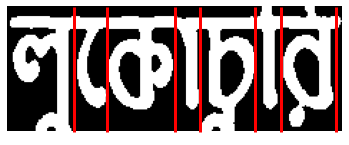

ValueError: Image size of -1x203 pixels is too large. It must be less than 2^16 in each direction.

In [9]:
from PIL import Image
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import cv2

#width,height=300,100
#dim=(width,height)
userimage = input('Upload The Image:')
image = cv2.imread(userimage, cv2.IMREAD_GRAYSCALE)
#image= cv2.resize(image,dim,interpolation=cv2.INTER_AREA)
h,w=image.shape[:2]
image=cv2.fastNlMeansDenoising(image,11,11,15,21)
img1 = cv2.GaussianBlur(image, (5,5 ), 0)
#nor_img = cv2.normalize(img1, 0, 100, cv2.NORM_MINMAX)
img = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1]
cv2.imwrite('binary.png',img)
#img = Image.open('binary.jpg')
#img = image.convert('1')
arr = (np.array(img)<(255)/2) #I'm considering black parts as filled
#plt.imshow(arr)
#plt.subplot(211)
#plt.imshow(arr, aspect="auto")
#plt.subplot(212)
#plt.plot(arr.sum(axis=0))
#plt.xlim(0,arr.shape[1])
#x_lines = signal.find_peaks(-arr.sum(axis=0))[0]

#plt.imshow(arr, aspect="auto")
#plt.vlines(x_lines, 0, arr.shape[0], color="r")
threshold = 15

x_lines = signal.find_peaks(-arr.sum(axis=0))[0]
x_lines = x_lines[arr.sum(axis=0)[x_lines]<threshold]

plt.imshow(arr, cmap='gray')
plt.vlines(x_lines, 0,arr.shape[0], color="r",linewidth=3)


plt.axis('off')
plt.savefig('box.jpg',bbox_inches='tight',transparent=True,pad_inches=-0.1)

#plt.figure('box.jpg')
#plt.axis('off')
plt.show()
for i, x in enumerate(x_lines):
    if i==0:
        plt.imshow(arr[:,:x_lines[i]], cmap="gray")
        plt.axis('off')
        plt.savefig("output/fig%i"%i,bbox_inches='tight',transparent=True,pad_inches=-0.)
        #plt.show()
    else:
        plt.imshow(arr[:,x_lines[i-1]:x_lines[i]], cmap="gray")
        plt.axis('off')
        plt.savefig("output/fig%i"%i,bbox_inches='tight',transparent=True,pad_inches=-0.)
        #plt.show()
        
plt.imshow(arr[:,x_lines[i]:], cmap="gray")
plt.axis('off')
plt.savefig("output/fig%i"%(i+1),bbox_inches='tight',transparent=True,pad_inches=-0.1)
#plt.show()

#delete unnecessary images
from PIL import Image
import os
def delete_unnecessary_images():
    folder_images = "C:/Users/bivan/Desktop/preprocessing/output/"
    for _, _, image_filenames in os.walk(folder_images):
        for image_filename in image_filenames:

            with Image.open(folder_images+image_filename)as img:
                #The process which had your file opened was your program itself
                #including a with context ensure the file actually gets closed
                w, h = img.size
            #print(w)

            if(not (w >= 40)):
               os.remove(folder_images+image_filename)
delete_unnecessary_images()
            
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path= r'C:\Users\bivan\Desktop\preprocessing\output'

img_width, img_height = 32, 32

# load the trained model
model = tf.keras.models.load_model('bangla1.h5')
images = []
img_list=[]


for img in os.listdir(folder_path):
    #img = cv2.imread(os.path.join(folder_path,img))
    
    #print(len(img))
    img = os.path.join(folder_path, img)
    img = image.load_img(img,target_size=(img_width, img_height))
    
    img = image.img_to_array(img)
    img_copy = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_copy = cv2.GaussianBlur(img_copy, (3,3), 0)
    #img_copy = cv2.erode(img_copy, (3, 3), 1)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY_INV)
    
    img_final = np.resize(img_thresh, (32,32))
    img_final =np.reshape(img_thresh, (1,32,32,-1))
    #plt.imshow(img_thresh, cmap='gray')
    #plt.show()
    #images.append(img_final)
    #print(images)
    #img_list.append(img_thresh)
    predictions = model.predict(img_final)
    score = tf.nn.softmax(predictions[0])
    
    
    result =  [CATEGORIES[list(CATEGORIES.keys())[np.argmax(score)]]]
    for sublist in result:
        #for item in sublist:
        images.append(sublist)
        
str2=''.join(images)
print('Predicted String Is:',str2)

#Delete files from 'Images' folder
folder_path = 'C:/Users/bivan/Desktop/preprocessing/output/'
filelist = [ f for f in os.listdir(folder_path) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(folder_path, f))

In [ ]:
print('Printed String is: পর াঢ া' )